In [39]:
# These are all the modules we'll be using later. Make sure you can import them
# before proceeding further.
from __future__ import print_function
import matplotlib.pyplot as plt
import numpy as np
import os
import sys
import tarfile
from IPython.display import display, Image
from PIL import Image
from scipy import ndimage
from sklearn.linear_model import LogisticRegression
from six.moves.urllib.request import urlretrieve
import cPickle as pickle

# Config the matlotlib backend as plotting inline in IPython
%matplotlib inline
%autosave 300
np.set_printoptions(threshold=np.inf)

Autosaving every 300 seconds


In [40]:
train_pickle_file = './SVHN_basic_train_labels.pickle'

with open(train_pickle_file, 'rb') as f:
  save = pickle.load(f)
  train_labels = save['train_image_labels']
  del save  # hint to help gc free up memory
  print('Training set', train_labels.shape)
print(train_labels[0:2,:])

Training set (33402, 6)
[[ 2.  0.  0.  0.  1.  9.]
 [ 2.  0.  0.  0.  2.  3.]]


In [41]:
train_pickle_file = 'SVHN_basic_train_data_basic.pickle'

with open(train_pickle_file, 'rb') as f:
  save = pickle.load(f)
  train_dataset = save['train_dataset']
  del save  # hint to help gc free up memory
  print('Training set',train_dataset.shape)
print(train_labels[0:2,:])

Training set (33402, 32, 32)
[[ 2.  0.  0.  0.  1.  9.]
 [ 2.  0.  0.  0.  2.  3.]]


In [42]:
test_pickle_file = './SVHN_basic_test_labels.pickle'

with open(test_pickle_file, 'rb') as f:
  save = pickle.load(f)
  test_labels = save['test_image_labels']
  del save  # hint to help gc free up memory
  print('Test set', test_labels.shape)
print(test_labels[0:2,:])

Test set (13068, 6)
[[  1.   0.   0.   0.   0.   5.]
 [  3.   0.   0.   2.   1.  10.]]


In [43]:
test_pickle_file = 'SVHN_basic_test_data_basic.pickle'

with open(test_pickle_file, 'rb') as f:
  save = pickle.load(f)
  test_dataset = save['test_dataset']
  del save  # hint to help gc free up memory
  print('Test set',test_dataset.shape)
print(test_labels[0:2,:])

Test set (13068, 32, 32)
[[  1.   0.   0.   0.   0.   5.]
 [  3.   0.   0.   2.   1.  10.]]



Training Labels



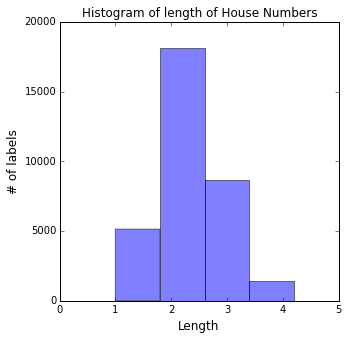

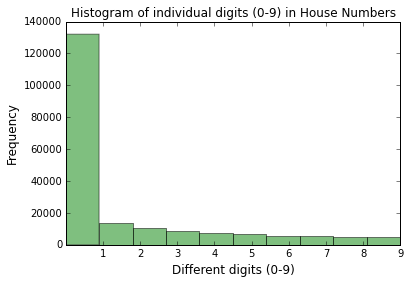


Test Labels



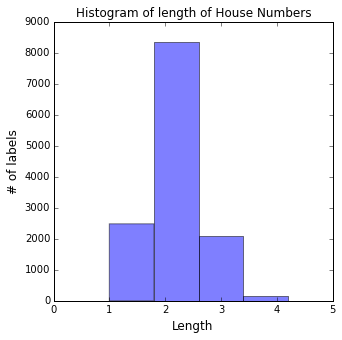

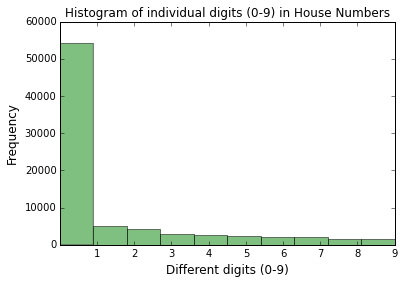

In [49]:

def plot_length_and_labels(label_data):
    #print(label_data)
    #print(label_data.shape)
    numBins = 10
    numBins_len = 5
    plt.figure(num=None, figsize=(5, 5), dpi=60, facecolor='w', edgecolor='k')
    plt.subplots_adjust(hspace=.5)
    plt.subplots_adjust(wspace=.5)
    digit_freq=np.zeros(label_data.shape[0]*label_data.shape[1])
    ax = plt.subplot(1,1,1)
    ax.set_xlim([0,5])
    plt.xlabel('Length', fontsize=12)
    plt.ylabel('# of labels', fontsize=12)
    plt.title('Histogram of length of House Numbers')
    ax.hist(label_data[:,0],numBins_len,color='blue',alpha=0.5)
        
            
        
    plt.show()
    total_digit_count=0
    for label_counter in range(label_data.shape[0]):
        for digit_counter in range(5):
            digit=label_data[label_counter,digit_counter + 1]
            digit_freq[total_digit_count]= digit % 10
            total_digit_count += 1
            
    ax = plt.subplot(1,1,1)
    x_lbl="Different digits (0-9)"
    plt.xlabel(x_lbl, fontsize=12)
    plt.ylabel('Frequency', fontsize=12)
    plt.xticks(np.arange(1, 11, 1))
    plt.title('Histogram of individual digits (0-9) in House Numbers')
    ax.hist(digit_freq,numBins,color='green',alpha=0.5)       
    plt.show()
    
    
print("\nTraining Labels\n")
plot_length_and_labels(train_labels)


print("\nTest Labels\n")
plot_length_and_labels(test_labels)

#### 1. In the above plots, blue histograms are for length of house numbers, and green ones are for individual digits in those house numbers.
#### 2. As we see above, digit labels in train and test data have similar distribution.

Samples from Train Data
	Label: [  3.   0.   0.   1.   6.  10.]
	Label: [ 1.  0.  0.  0.  0.  3.]
	Label: [ 1.  0.  0.  0.  0.  4.]
	Label: [ 2.  0.  0.  0.  1.  7.]


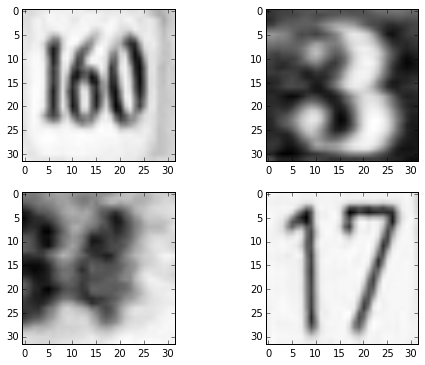

In [45]:
plt.figure(num=None, figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')


def visualize_samples(data, labels, indices):
    for count in range(indices.shape[0]):
        print("\tLabel:",labels[indices[count]])
        ax = plt.subplot(2,2,count+1)
        ax.imshow(data[indices[count]], cmap='Greys_r')
    plt.show()

print("Samples from Train Data")
random_indices=np.random.randint(0,train_labels.shape[0],4)
visualize_samples(train_dataset, train_labels, random_indices)

Samples from test Data
	Label: [  3.   0.   0.   1.   2.  10.]
	Label: [ 2.  0.  0.  0.  8.  8.]
	Label: [ 3.  0.  0.  1.  6.  5.]
	Label: [ 3.  0.  0.  1.  3.  5.]


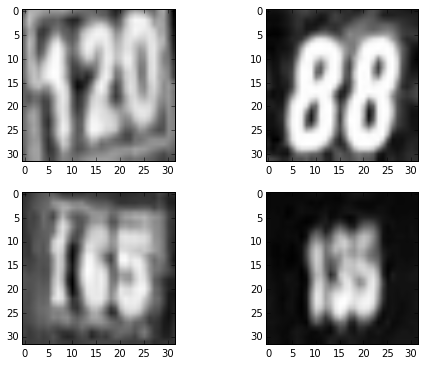

In [46]:
plt.figure(num=None, figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')

print("Samples from test Data")
random_indices=np.random.randint(0,test_labels.shape[0],4)
visualize_samples(test_dataset, test_labels, random_indices)